<a href="https://colab.research.google.com/github/sudeegungor/USD-TRY-Prediction/blob/main/USD_TRY_PREDICT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Load your historical exchange rate data (replace with your own dataset)
# Assume you have a CSV file with columns: 'Date', 'USDTRY', and other features
data = pd.read_csv('USD_TRY_Historical_Data.csv')
data['Change %'] = data['Change %'].str.replace('%', '')

# Convert the 'Change %' column to numeric
data['Change %'] = pd.to_numeric(data['Change %'])
data.head()

data['Date'] = pd.to_datetime(data['Date'])

# Sort DataFrame by 'Date' column in increasing order
data = data.sort_values(by='Date')

data.head()

,Date,Price,Open,High,Low,Vol.,Change %
2132,2019-01-01,5.2933,5.2896,5.2933,5.2540,NaN,0.09
2131,2019-01-02,5.4003,5.3010,5.4215,5.2737,NaN,2.02
2130,2019-01-03,5.4664,5.4002,5.8300,5.3857,NaN,1.22
2129,2019-01-04,5.3311,5.4587,5.4778,5.3058,NaN,-2.48
2128,2019-01-07,5.3848,5.3362,5.4153,5.3171,NaN,1.01


In [ ]:
data.tail()


,Date,Price,Open,High,Low,Vol.,Change %
4,2024-03-04,31.5764,31.4045,31.7714,31.3540,NaN,0.72
3,2024-03-05,31.7054,31.5764,31.8018,31.5525,NaN,0.41
2,2024-03-06,31.8036,31.7054,31.9149,31.6682,NaN,0.31
1,2024-03-07,31.9382,31.8043,31.9501,31.7412,NaN,0.42
0,2024-03-08,31.9639,31.9384,31.9645,31.8375,NaN,0.08


In [ ]:
data.shape


(2133, 7)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2133 entries, 2132 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2133 non-null   datetime64[ns]
 1   Price     2133 non-null   float64       
 2   Open      2133 non-null   float64       
 3   High      2133 non-null   float64       
 4   Low       2133 non-null   float64       
 5   Vol.      0 non-null      float64       
 6   Change %  2133 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 133.3 KB


In [ ]:
data.isnull().sum()


Date           0
Price          0
Open           0
High           0
Low            0
Vol.        2133
Change %       0
dtype: int64

In [ ]:
data = data.drop(columns=['Vol.'])


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2133 entries, 2132 to 0
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2133 non-null   datetime64[ns]
 1   Price     2133 non-null   float64       
 2   Open      2133 non-null   float64       
 3   High      2133 non-null   float64       
 4   Low       2133 non-null   float64       
 5   Change %  2133 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 116.6 KB


In [ ]:
data.describe()

,Price,Open,High,Low,Change %
count,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000
mean,12.133980,12.115431,12.210456,12.030080,0.088833
std,6.929124,6.917874,6.956767,6.883189,0.939825
min,5.164500,5.158500,5.225900,5.158500,-17.730000
25%,6.861700,6.860800,6.876900,6.841500,-0.050000
50%,8.455500,8.455500,8.521400,8.401100,0.060000
75%,17.910100,17.904200,17.974500,17.744400,0.200000
max,31.963900,31.938400,31.964500,31.837500,12.600000


<ipython-input-402-d1a64b1a146e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


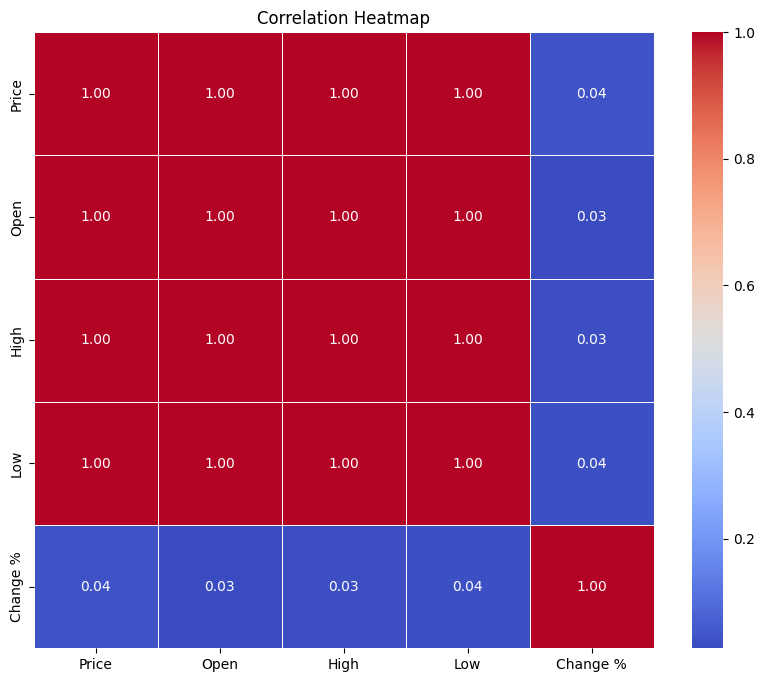

In [402]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-403-b08e49660e4d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'],color='red')


<Axes: xlabel='Price', ylabel='Density'>

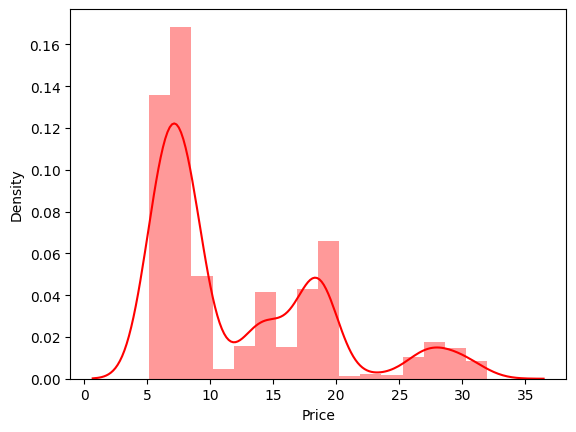

In [403]:
sns.distplot(data['Price'],color='red')

In [404]:
X = data.drop(['Date','Price',],axis=1)
Y = data['Price']


In [ ]:
print(X)

         Open     High      Low  Change %
2132   5.2896   5.2933   5.2540      0.09
2131   5.3010   5.4215   5.2737      2.02
2130   5.4002   5.8300   5.3857      1.22
2129   5.4587   5.4778   5.3058     -2.48
2128   5.3362   5.4153   5.3171      1.01
...       ...      ...      ...       ...
4     31.4045  31.7714  31.3540      0.72
3     31.5764  31.8018  31.5525      0.41
2     31.7054  31.9149  31.6682      0.31
1     31.8043  31.9501  31.7412      0.42
0     31.9384  31.9645  31.8375      0.08

[2133 rows x 4 columns]


In [ ]:
print(Y)

2132     5.2933
2131     5.4003
2130     5.4664
2129     5.3311
2128     5.3848
         ...   
4       31.5764
3       31.7054
2       31.8036
1       31.9382
0       31.9639
Name: Price, Length: 2133, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [ ]:
# Initialize SVR model with specified parameters
svr_model = SVR(kernel='rbf', gamma=0.005, epsilon=0.01, C=100)

In [ ]:
# Train the SVR model
svr_model.fit(X_train, Y_train)

SVR(C=100, epsilon=0.01, gamma=0.005)

In [ ]:
Y_pred = svr_model.predict(X_test)

In [ ]:
print(Y_pred)

In [ ]:
# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0028229978710208117


In [ ]:
Y_test = list(Y_test)

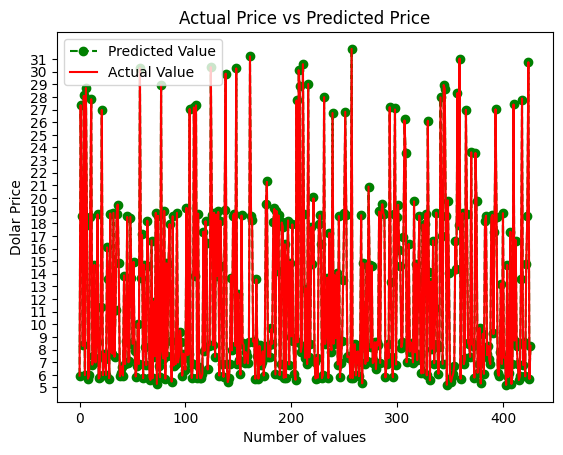

In [ ]:

plt.plot(Y_pred, color='green', label='Predicted Value',linestyle='--', marker='o')
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.yticks([i for i in range(int(data['Price'].min()), int(data['Price'].max()) + 1, 1)])

plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Dolar Price')
plt.legend()
plt.show()
